# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read 🌸 iris dataset

In [2]:
df = pd.read_csv('iris.data', header=None)
df.head(2)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# add column names which you find them in names file

In [3]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.head(1).T

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2
class,Iris-setosa


# check there is any lost data or not
## as you see there is no lost data 👍

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# calculate correlations between features 📊
## first check dtypes
## then calculate corr

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
corr = df.iloc[:,:-1].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# add new feature (petal ratio) 🎯
## change the location of new generated feature

In [7]:
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df = df[df.columns[:-2].append(pd.Index([df.columns[-1]])).append(pd.Index([df.columns[-2]]))]
df.head(1).T

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2
petal_ratio,7.0
class,Iris-setosa


# Plot 🌡️heatmap of corrs

In [8]:
corr = df.iloc[:,:-1].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.563335
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.320919
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.684091
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.734370
petal_ratio,-0.563335,0.320919,-0.684091,-0.734370,1.000000


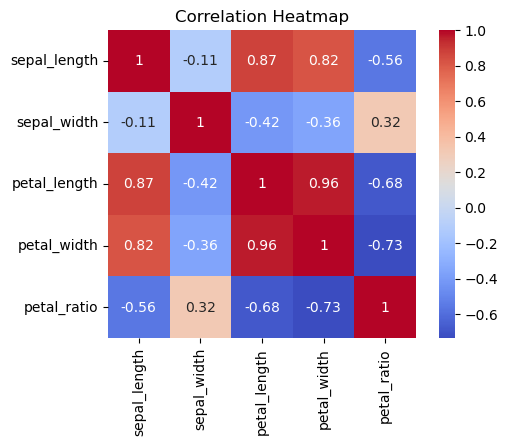

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, square=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# plot pair plots
## Petal ratio kind of doing clustering. it separates two range of petal length and width which you can draw a line among them.
## There is no linear relationship between petal ratio and petal height/width

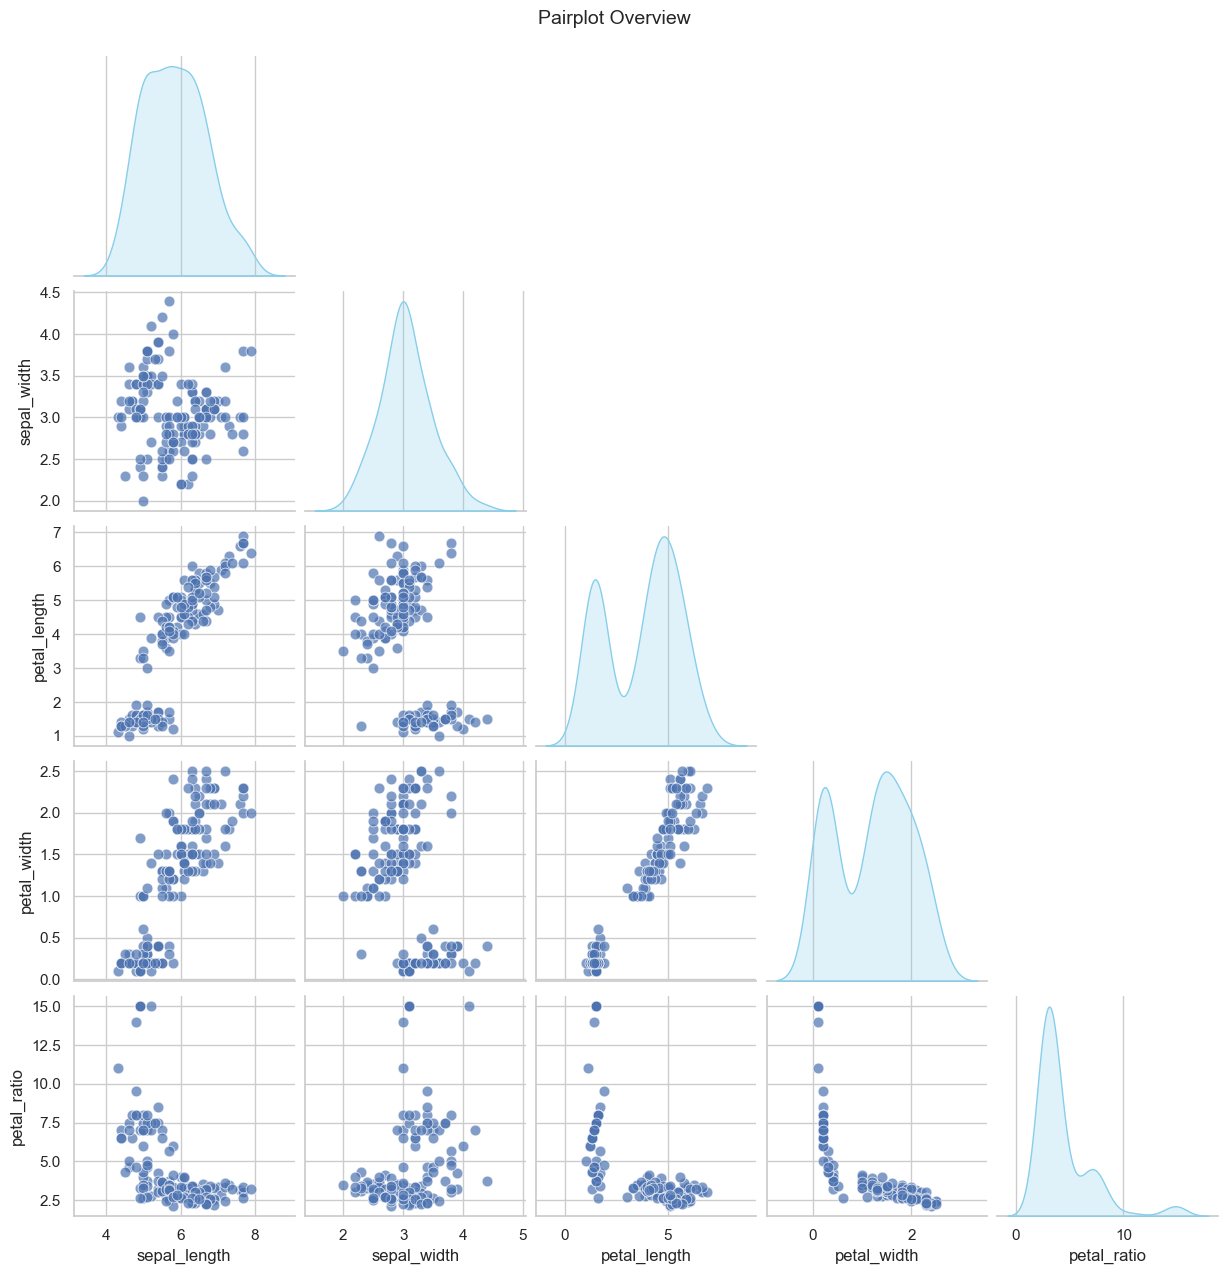

In [10]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, 
             diag_kind="kde",                  # smooth density curve instead of histogram)
             corner=True,                      # show only lower triangle (cleaner)
             plot_kws=dict(alpha=0.7, s=60),   # point transparency + size
             diag_kws=dict(fill=True, color="skyblue")  # pretty KDE color
            ) 
plt.suptitle("Pairplot Overview", y=1.02, fontsize=14)
plt.show()

# plot box plots
## because the petal_ratio values are continues I created 5 bins to make plotting a bit simpler 
## The plots shows adding petal ratio helps us to separate iris-setosa from other two classes easily

In [11]:
group_col = 'petal_ratio_bin'
other_features = [col for col in df.columns if col != group_col]
other_features = other_features[:-2]
df[group_col] = pd.cut(df['petal_ratio'], bins=5)
print(other_features)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


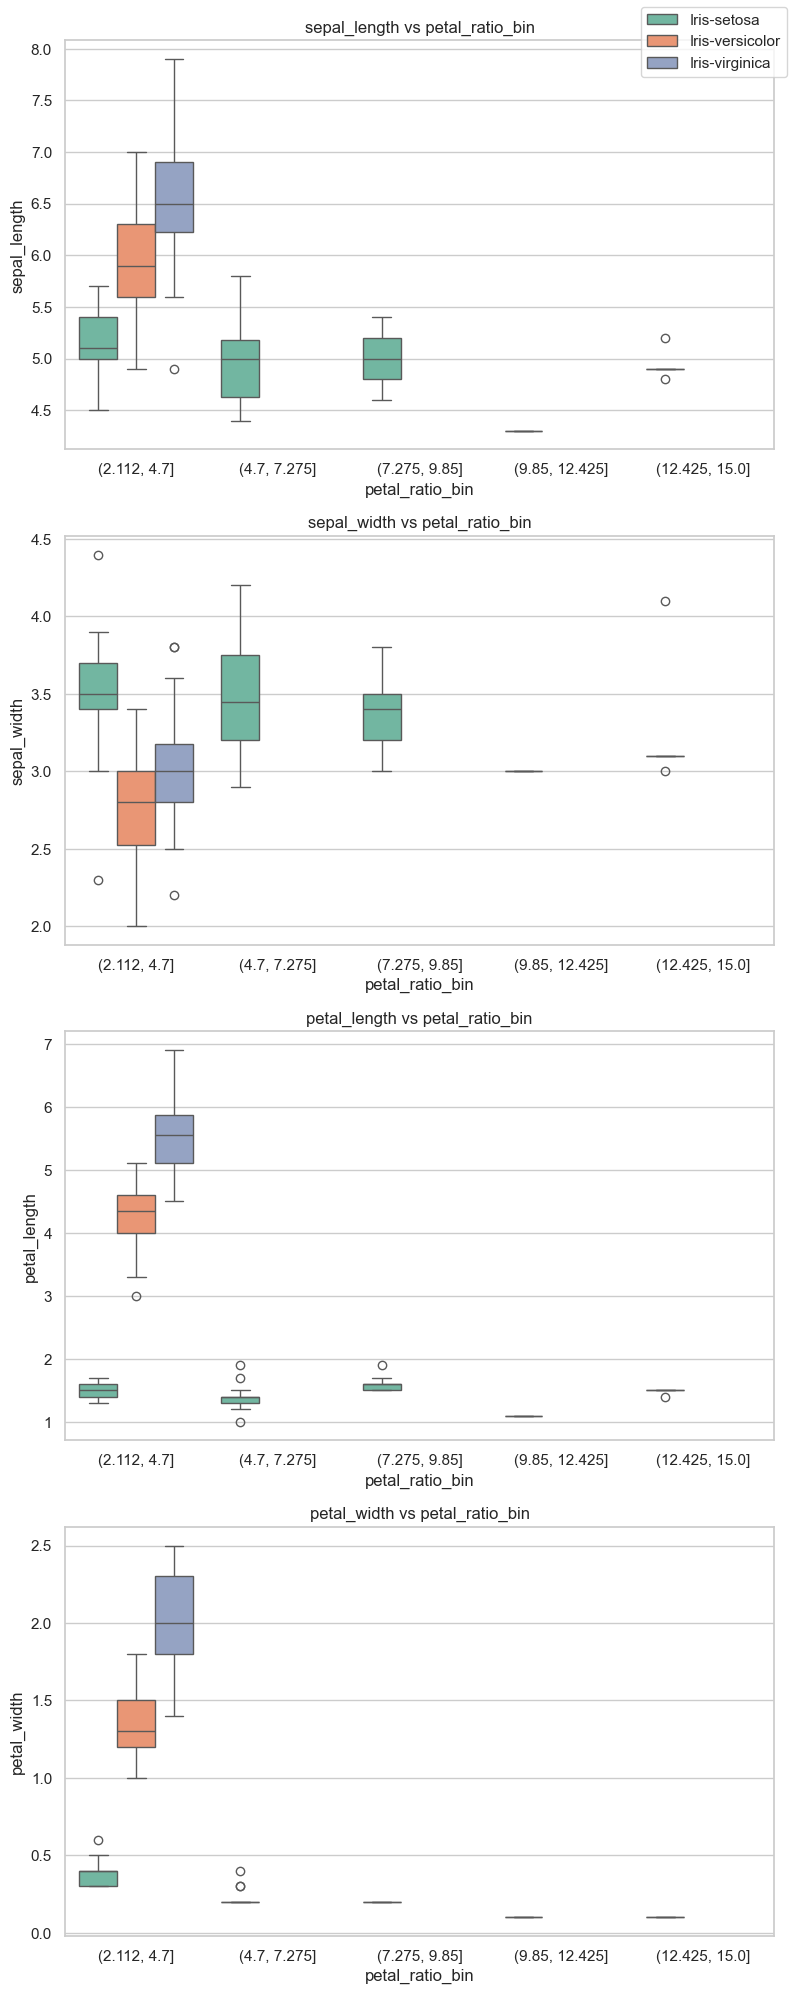

In [12]:
# Create figure: 5 rows, 1 column
fig, axes = plt.subplots(len(other_features), 1, figsize=(8, 5*len(other_features)))

# If only one feature, axes is not a list, so wrap it
if len(other_features) == 1:
    axes = [axes]

# Loop through features and plot
for ax, feature in zip(axes, other_features):
    sns.boxplot(x=group_col, y=feature, hue='class', data=df, ax=ax, palette='Set2')
    ax.set_title(f'{feature} vs {group_col}')
    ax.legend_.remove()  # remove individual legends

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

# plot scatter plot
## as mentioned above, this new feature does some kind of clustering

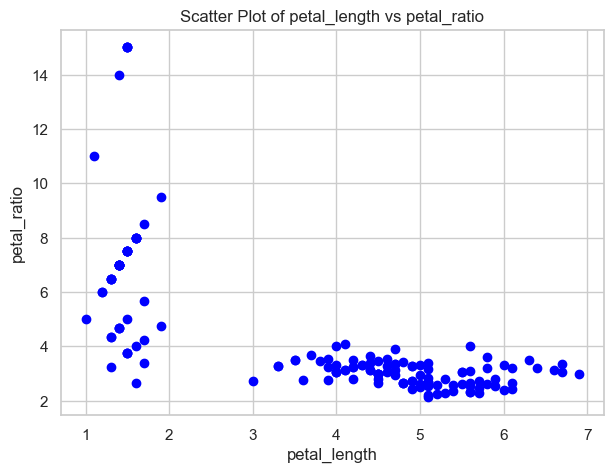

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df['petal_length'], df['petal_ratio'], color='blue')
plt.xlabel('petal_length')
plt.ylabel('petal_ratio')
plt.title('Scatter Plot of petal_length vs petal_ratio')
plt.show()

In [14]:
df['petal_ratio_q'] = df.groupby('class')['petal_ratio'].transform(
    lambda x: pd.qcut(x, q=2, labels=['low', 'high'])
)
df

,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,class,petal_ratio_bin,petal_ratio_q
0,5.1,3.5,1.4,0.2,7.000000,Iris-setosa,"(4.7, 7.275]",low
1,4.9,3.0,1.4,0.2,7.000000,Iris-setosa,"(4.7, 7.275]",low
2,4.7,3.2,1.3,0.2,6.500000,Iris-setosa,"(4.7, 7.275]",low
3,4.6,3.1,1.5,0.2,7.500000,Iris-setosa,"(7.275, 9.85]",high
4,5.0,3.6,1.4,0.2,7.000000,Iris-setosa,"(4.7, 7.275]",low
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.260870,Iris-virginica,"(2.112, 4.7]",low
146,6.3,2.5,5.0,1.9,2.631579,Iris-virginica,"(2.112, 4.7]",low
147,6.5,3.0,5.2,2.0,2.600000,Iris-virginica,"(2.112, 4.7]",low
148,6.2,3.4,5.4,2.3,2.347826,Iris-virginica,"(2.112, 4.7]",low


In [21]:
df.groupby('class')['petal_ratio_q'].value_counts().unstack()

petal_ratio_q,low,high
class,,
Iris-setosa,31,19
Iris-versicolor,25,25
Iris-virginica,26,24


In [24]:
df.groupby('class')['petal_ratio'].max()

class
Iris-setosa        15.0
Iris-versicolor     4.1
Iris-virginica      4.0
Name: petal_ratio, dtype: float64

In [25]:
df.groupby('class')['petal_ratio'].min()

class
Iris-setosa        2.666667
Iris-versicolor    2.666667
Iris-virginica     2.125000
Name: petal_ratio, dtype: float64